In [4]:
import tarfile
import os
import urllib.request

In [17]:
def retrieve_web_data(url,data_path,filename):
    if len(url) == 0:
        return
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    urllib.request.urlretrieve(url,data_path+filename)
    target_file=tarfile.open(data_path+filename)
    target_file.extractall(data_path)
    return

In [18]:
root_url='https://raw.githubusercontent.com/ageron/handson-ml/master/'
path='datasets/housing'
filename='/housing.tgz'
retrieve_web_data(root_url+path+filename,path,filename)

In [1]:
import pandas as pd
def load_file(filename):
    return pd.read_csv(filename)

In [2]:
houses_df = load_file('datasets/housing/housing.csv')

In [3]:
houses_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
houses_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

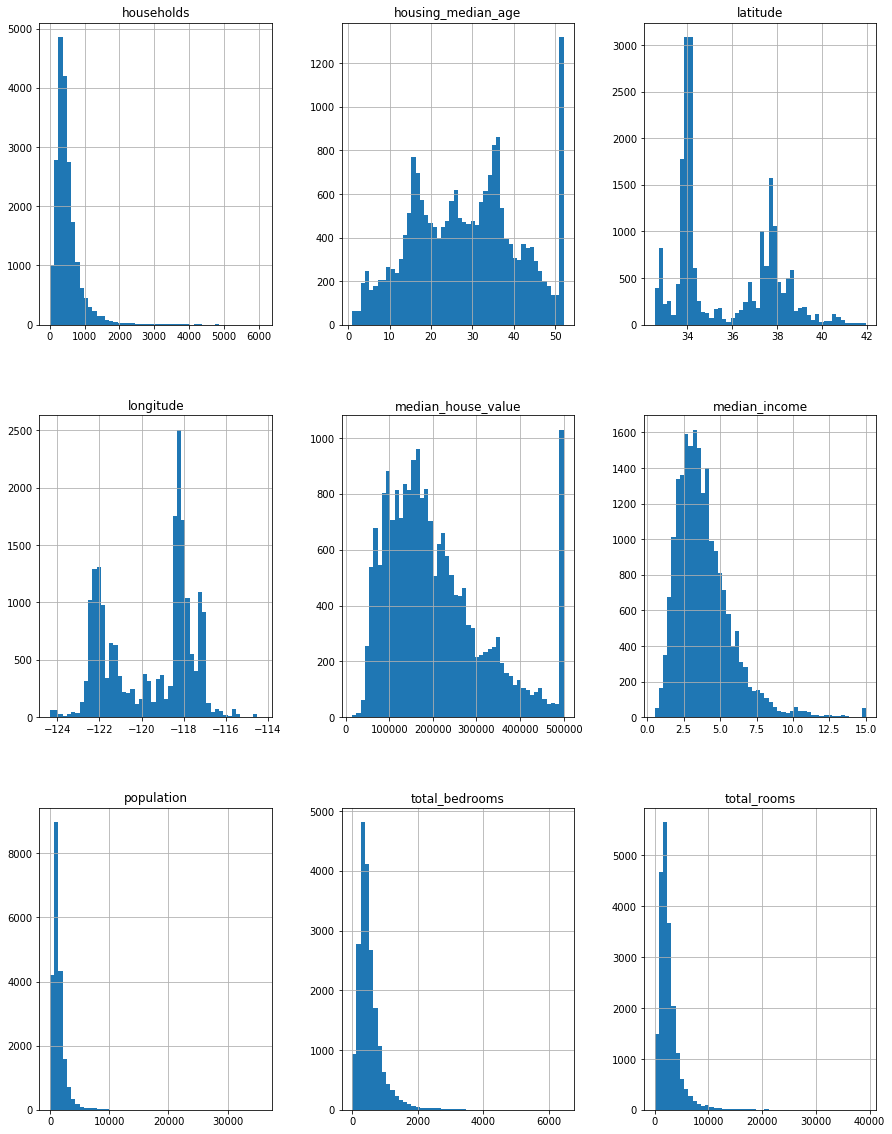

In [7]:
houses_df.hist(bins=50,figsize=(15,20))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(houses_df,test_size=.33,random_state=42)

In [10]:
import numpy as np
houses_df['incoming_cat']=np.ceil(houses_df['median_income']/1.5)
houses_df['incoming_cat'].where(houses_df['incoming_cat']<5,5.0,inplace=True)

In [11]:
houses_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incoming_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
sSplit=StratifiedShuffleSplit(1,test_size=.33,random_state=42)

In [14]:
for train_index, test_index in sSplit.split(houses_df,houses_df['incoming_cat']):
    train_set=houses_df.iloc[train_index]
    test_set = houses_df.iloc[test_index]

In [15]:
houses_df['incoming_cat'].value_counts()/len(houses_df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: incoming_cat, dtype: float64

In [16]:
random_sample=houses_df.sample(frac=.67,replace=False)

In [17]:
random_sample['incoming_cat'].value_counts()/len(random_sample)

3.0    0.350640
2.0    0.321064
4.0    0.175935
5.0    0.114325
1.0    0.038036
Name: incoming_cat, dtype: float64

In [18]:
train_set['incoming_cat'].value_counts()/len(train_set)-houses_df['incoming_cat'].value_counts()/len(houses_df)

3.0    1.160436e-05
2.0   -1.079150e-06
4.0    7.988510e-07
5.0   -3.243055e-05
1.0    2.110648e-05
Name: incoming_cat, dtype: float64

In [19]:
for s in (train_set,test_set):
    s.drop(['incoming_cat'],inplace=True,axis=1)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
train_set_copy=train_set.copy()

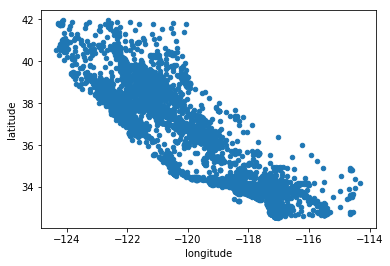

In [21]:
houses_df.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

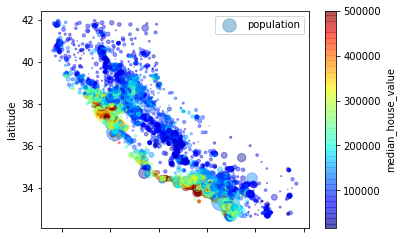

In [22]:
houses_df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=houses_df['population']/100,label="population",
              c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [23]:
corr_matrix=houses_df.corr()

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
incoming_cat          0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1134880f0>,
      dtype=object)

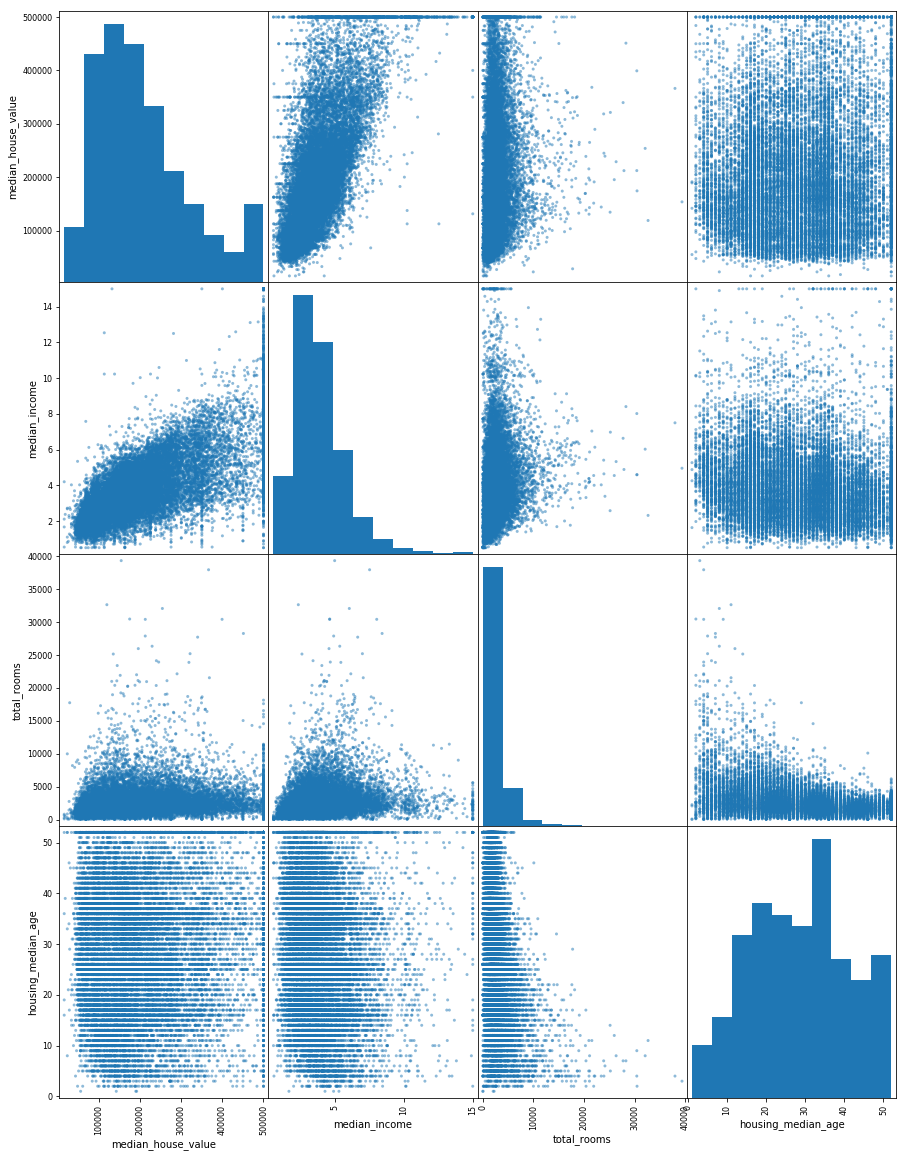

In [28]:
from pandas.tools.plotting import scatter_matrix
attributes=['median_house_value',"median_income","total_rooms","housing_median_age"]
scatter_matrix(houses_df[attributes],figsize=(15,20))


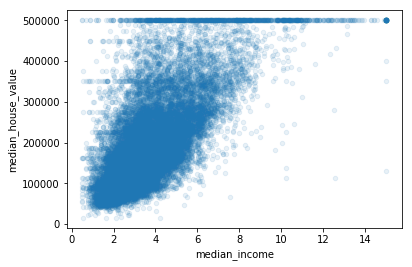

In [76]:
houses_df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [29]:
from sklearn.preprocessing import Imputer
iPuter = Imputer(strategy='median')

In [32]:
houses_df_num = houses_df.drop(['ocean_proximity'],axis=1)
X=iPuter.fit_transform(houses_df_num)
houses_df_num=pd.DataFrame(X,columns=houses_df_num.columns)
houses_df_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,incoming_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [33]:
print(houses_df_num.info())
print(iPuter.statistics_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
incoming_cat          20640 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB
None
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05  3.0000e+00]


In [34]:
iPuter.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  3.0000e+00])

In [36]:
houses_df_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  3.0000e+00])

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
houses_df_cat_encoded=le.fit_transform(houses_df['ocean_proximity'])

In [41]:
houses_df['ocean_proximity'].factorize()

(array([0, 0, 0, ..., 2, 2, 2]),
 Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object'))

In [44]:
from sklearn.preprocessing import OneHotEncoder
oneHot = OneHotEncoder()

In [47]:
house_cat_onehot=oneHot.fit_transform(houses_df_cat_encoded.reshape(-1,1))
house_cat_onehot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [48]:
house_cat_onehot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [50]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()

In [51]:
house_cat_onehot_bin=lb.fit_transform(houses_df['ocean_proximity'])

In [52]:
house_cat_onehot_bin

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [53]:
house_cat_onehot_bin_df = pd.DataFrame(house_cat_onehot_bin,columns=lb.classes_)
house_cat_onehot_bin_df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [60]:
housing=pd.concat([houses_df_num,house_cat_onehot_bin_df],axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,incoming_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,0,0,0,1,0


In [67]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'incoming_cat', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin
total_rooms,households,population,total_bedrooms=3,6,5,4
class CombineFeatureTransformer(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X):
        return self
    def transform(self,X):
        rooms_per_households=X[:,total_rooms]/X[:,households]
        population_per_households=X[:,population]/X[:,households]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,total_bedrooms]/X[:,total_rooms]
            return np.c_[X,rooms_per_households,population_per_households,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_households,population_per_households]

In [94]:
cFT = CombineFeatureTransformer()

In [95]:
X=cFT.fit_transform(housing.values)

In [91]:
housing.values

array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    0.  ,    0.  ,    0.  ]])

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pip = Pipeline([('Imputer',Imputer(strategy='median')),('feature_combine',CombineFeatureTransformer()),('standardization',StandardScaler())])

X=pip.fit_transform(houses_df.drop(['ocean_proximity'],axis=1).values)

In [205]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,names):
        self.names=names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.names].values
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [209]:
num_attribs = list(houses_df_num.columns)
cat_attribs = ["ocean_proximity"]
num_pip = Pipeline([('Selector',DataFrameSelector(num_columns)),('Imputer',Imputer(strategy='median')),('Feature_combine',CombineFeatureTransformer()),('Standardization',StandardScaler())])
cat_pip=Pipeline([('Selector',DataFrameSelector(cat_attribs)),('Encoder',OneHotEncoder(sparse=False))])
from sklearn.pipeline import FeatureUnion

fU = FeatureUnion(transformer_list=[('cat pip',cat_pip)])#('num pip',num_pip),
fU.fit_transform(houses_df)

ValueError: could not convert string to float: 'INLAND'

In [214]:
num_attribs = list(houses_df_num.columns)
cat_attribs = ["ocean_proximity"]

# old_num_pipeline = Pipeline([
#         ('selector', OldDataFrameSelector(num_attribs)),
#         ('imputer', Imputer(strategy="median")),
#         ('attribs_adder', CombinedAttributesAdder()),
#         ('std_scaler', StandardScaler()),
#     ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])
old_full_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])
# old_housing_prepared = old_full_pipeline.fit_transform(houses_df)
# old_housing_prepared
OneHotEncoder(sparse=False).fit_transform(le.fit_transform(houses_df['ocean_proximity'].values).reshape(-1,1))

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [119]:
data_set=np.c_[X,house_cat_onehot_bin]

In [120]:
data_set.shape

(20640, 18)

In [122]:
house_cat_onehot_bin.shape

(20640, 5)

In [125]:
houses_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'incoming_cat'],
      dtype='object')

In [148]:
target=houses_df['median_house_value'].values

In [149]:
features=np.delete(data_set,8,1)
features

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [150]:
train_X,test_X,train_y,test_y=train_test_split(features,target,test_size=0.33)

In [151]:
from sklearn.linear_model import LinearRegression
linearR = LinearRegression()
linearR.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
predict_train_y=linearR.predict(train_X)

In [157]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(np.sqrt(mean_squared_error(train_y,predict_train_y)))
print(mean_absolute_error(train_y,predict_train_y))

67817.75101043047
49204.62069713625


In [155]:
print(train_y[:5])
print(predict_train_y[:5])

[189900. 133200. 336700.  57100. 256400.]
[180272. 146288. 306912.  36624. 266000.]


In [158]:
from sklearn.tree import DecisionTreeRegressor

dtReg=DecisionTreeRegressor()
dtReg.fit(train_X,train_y)
predict_train_y_tree=dtReg.predict(train_X)

In [159]:
print(np.sqrt(mean_squared_error(train_y,predict_train_y_tree)))
print(mean_absolute_error(train_y,predict_train_y_tree))

0.0
0.0


In [160]:
predict_train_y_tree

array([189900., 133200., 336700., ...,  96400.,  90600., 500001.])

In [161]:
predict_test_y_tree=dtReg.predict(test_X)
print(np.sqrt(mean_squared_error(test_y,predict_test_y_tree)))
print(mean_absolute_error(test_y,predict_test_y_tree))

72308.07440899216
46598.98766881973


In [162]:
predict_test_y_linear=linearR.predict(test_X)
print(np.sqrt(mean_squared_error(test_y,predict_test_y_linear)))
print(mean_absolute_error(test_y,predict_test_y_linear))

68747.2067330897
49569.041103934236


In [165]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtReg,train_X,train_y,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-score)

In [166]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std:",scores.std())

display_scores(rmse_score)

Scores: [74792.9006372  76602.79340462 66272.33722754 73855.51284624
 73404.56608085 69792.13140236 72209.49396212 71635.25413637
 71733.19859086 68594.86630074]
Mean: 71889.30545888966
Std: 2894.8756868818787


In [167]:
score=cross_val_score(linearR,train_X,train_y,scoring='neg_mean_squared_error',cv=10)
rmse_scores_linear=np.sqrt(-score)
display_scores(rmse_scores_linear)

Scores: [69852.71752232 68379.2983742  63971.31983085 70815.5287343
 69407.63677637 64422.44378554 70081.65338913 67147.2039307
 69851.5437073  67125.58951239]
Mean: 68105.49355630965
Std: 2272.802368441733


In [168]:
from sklearn.ensemble import RandomForestRegressor
rfReg=RandomForestRegressor()
score=cross_val_score(rfReg,train_X,train_y,scoring='neg_mean_squared_error',cv=10)
rmse_scores_ensemble=np.sqrt(-score)
display_scores(rmse_scores_ensemble)

Scores: [55997.83504594 53209.71213307 50814.86486485 59909.13937639
 52687.13810574 51859.33113437 53455.77470024 54198.73306188
 54253.38862376 52682.13108198]
Mean: 53906.804812820956
Std: 2409.0410993839523


In [169]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

grid_search=GridSearchCV(rfReg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(train_X,train_y)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [170]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [171]:
predict_y_best_rf=grid_search.best_estimator_.predict(train_X)
def display(targets,predicts):
    print(np.sqrt(mean_squared_error(targets,predicts)))
    print(mean_absolute_error(targets,predicts))

In [172]:
display(train_y,predict_y_best_rf)

20052.492210918896
12973.347989586346


In [173]:
predict_test_y_best_rf=grid_search.best_estimator_.predict(test_X)
display(test_y,predict_test_y_best_rf)

50467.480750143055
33854.64454883539


In [175]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_features': 8, 'n_estimators': 30}
-2637428420.565678


In [178]:
grid_search.best_estimator_.feature_importances_.shape

(17,)

In [183]:
l=houses_df.columns.tolist()+['rooms_per_households','population_per_households','bedrooms_per_room']

In [184]:
l.remove('median_house_value')

In [192]:
names=l+house_cat_onehot_bin_df.columns.tolist()
names.remove('ocean_proximity')

In [193]:
sorted(zip(grid_search.best_estimator_.feature_importances_,names),reverse=True)

[(0.33358468897978344, 'median_income'),
 (0.12077911786990071, 'INLAND'),
 (0.11745855505497627, 'incoming_cat'),
 (0.11163691008400518, 'population_per_households'),
 (0.059347849730584705, 'longitude'),
 (0.05574722727960262, 'latitude'),
 (0.044283699582403, 'bedrooms_per_room'),
 (0.043386114256950686, 'housing_median_age'),
 (0.035318708209393944, 'rooms_per_households'),
 (0.017936933509409246, 'population'),
 (0.017007510892246867, 'total_rooms'),
 (0.01646147233770485, 'total_bedrooms'),
 (0.015327660501797036, 'households'),
 (0.005932093118947077, '<1H OCEAN'),
 (0.003552371810325423, 'NEAR OCEAN'),
 (0.001962856193400719, 'NEAR BAY'),
 (0.0002762305885681828, 'ISLAND')]

In [194]:
from sklearn.svm import SVR
SVR?

In [199]:
param_dict=[{'kernel':['linear'],'degree':[1,2,3,4,5],'shrinking':[True,False]},{'kernel':['rbf'],'shrinking':[True,False]}]
svr_model=SVR()
grid=GridSearchCV(svr_model,param_grid=param_dict,scoring='neg_mean_squared_error',cv=5)
grid.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'degree': [1, 2, 3, 4, 5], 'shrinking': [True, False]}, {'kernel': ['rbf'], 'shrinking': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [219]:
predict_train_y_svr=grid.best_estimator_.predict(tr)

-12081178968.464006